With a DataFrame containing air quality data with columns like State, County, City, Date Local, and various air quality parameters (NO2 Mean, O3 Mean, SO2 Mean, CO Mean, etc.), you can create a variety of plots to visualize and analyze the data. Here are some ideas:

Time Series Plot:
    Plot the time series of a specific air quality parameter (e.g., NO2 Mean, O3 Mean) over time (Date Local). This can help identify trends and seasonal patterns.

Box Plots:
    Create box plots to visualize the distribution of different air quality parameters across States or Counties.

Scatter Plots:
    Create scatter plots to explore relationships between different air quality parameters. For example, you might want to see if there's a correlation between NO2 Mean and O3 Mean.

Bar Charts:
    Plot bar charts to compare the average values of air quality parameters across different States or Counties.

Heatmaps:
    Use a heatmap to visualize the correlation matrix between different air quality parameters. This can help identify which pollutants are closely related.

Histograms:
    Plot histograms to understand the distribution of a specific air quality parameter. This can be useful for understanding the frequency of certain concentration levels.

Pie Charts:
    Create pie charts to show the proportion of different AQI categories (e.g., Good, Moderate, Unhealthy) for a specific parameter.

Map Visualization:
    If your DataFrame contains geographical information (latitude and longitude), you can create a map to visualize the spatial distribution of air quality across different cities or counties.

## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat


## Read the CSV file

In [9]:
poll = pd.read_csv("pollution_us_2000_2016.csv")

## Information about the sheet

In [33]:
poll.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State              object 
 1   County             object 
 2   City               object 
 3   Date Local         object 
 4   NO2 Mean           float64
 5   NO2 1st Max Value  float64
 6   NO2 1st Max Hour   int64  
 7   NO2 AQI            int64  
 8   O3 Mean            float64
 9   O3 1st Max Value   float64
 10  O3 1st Max Hour    int64  
 11  O3 AQI             int64  
 12  SO2 Mean           float64
 13  SO2 1st Max Value  float64
 14  SO2 1st Max Hour   int64  
 15  SO2 AQI            float64
 16  CO Mean            float64
 17  CO 1st Max Value   float64
 18  CO 1st Max Hour    int64  
 19  CO AQI             float64
dtypes: float64(10), int64(6), object(4)
memory usage: 266.5+ MB


In [34]:
poll.shape

(1746661, 20)

## To obtain data types of the columns

In [35]:
poll.dtypes

State                 object
County                object
City                  object
Date Local            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

## identifying all the null values from the attributes

In [36]:
poll.isna().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

## count of the records in the columns

In [37]:
poll.count()

State                1746661
County               1746661
City                 1746661
Date Local           1746661
NO2 Mean             1746661
NO2 1st Max Value    1746661
NO2 1st Max Hour     1746661
NO2 AQI              1746661
O3 Mean              1746661
O3 1st Max Value     1746661
O3 1st Max Hour      1746661
O3 AQI               1746661
SO2 Mean             1746661
SO2 1st Max Value    1746661
SO2 1st Max Hour     1746661
SO2 AQI               873754
CO Mean              1746661
CO 1st Max Value     1746661
CO 1st Max Hour      1746661
CO AQI                873338
dtype: int64

## Removing all the unnecessary columns

In [38]:
poll = poll.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
poll.head()

KeyError: "['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address', 'NO2 Units', 'O3 Units', 'SO2 Units', 'CO Units'] not found in axis"

Some entries have several values for the same observation date. As there's no specific explanation for these duplications nor answers to questions to the forum, I'll get the mean values for each date and location (state in the case below).
#
We also deal with the missing values in SO2 AQI and CO AQI.

In [39]:
## Prepare all 4 AQIs against state and date 
pollSt = poll[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs
pollSt = pollSt[pollSt.State!='Country Of Mexico']  # Delete Mexico
pollSt['Date Local'] = pd.to_datetime(pollSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollStGrouped = pollSt.groupby(level=0)

In [40]:
pollSt.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 144721 entries, ('Alabama', Timestamp('2013-12-01 00:00:00')) to ('Wyoming', Timestamp('2016-03-31 00:00:00'))
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   NO2 AQI  144721 non-null  float64
 1   O3 AQI   144721 non-null  float64
 2   SO2 AQI  144721 non-null  float64
 3   CO AQI   144721 non-null  float64
dtypes: float64(4)
memory usage: 4.9+ MB


## Air Quality Index

AQI stands for Air Quality Index. It is a numerical scale that communicates how clean or polluted the air currently is and what associated health effects might be a concern for the general population. The AQI is often used by government agencies to inform the public about the quality of air in a specific location.

The AQI typically includes measurements for various air pollutants, including:

    NO2 (Nitrogen Dioxide)
    O3 (Ozone)
    SO2 (Sulfur Dioxide)
    CO (Carbon Monoxide)

## Plot 4 AQIS with top 4 states

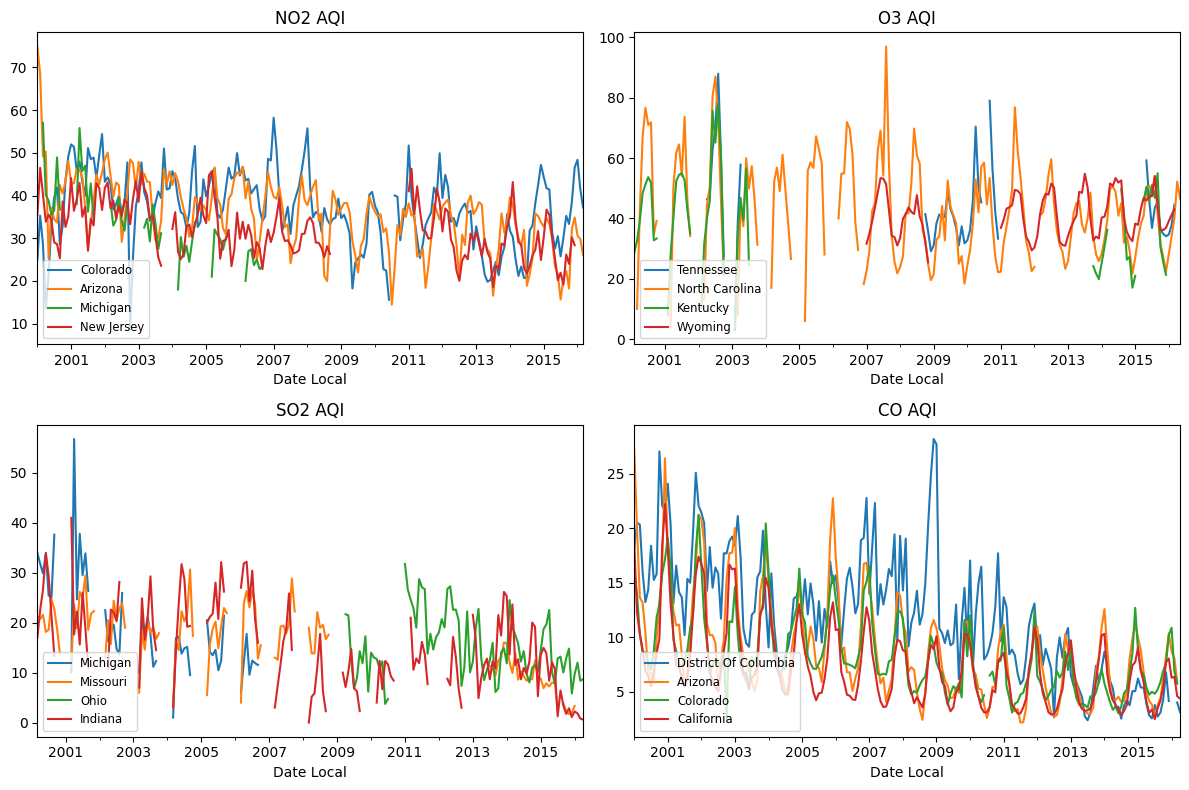

In [41]:
## Plot 4 AQIs with top 4 states
plt.figure(figsize=(12,8))

# NO2 AQI
plt.subplot(221)
pollNO2 = pollStGrouped['NO2 AQI']
pollNO2Top = pollNO2.mean().nlargest(4).index
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.title('NO2 AQI')

# O3 AQI
plt.subplot(222)
pollO3 = pollStGrouped['O3 AQI']
pollO3Top = pollO3.mean().nlargest(4).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')

# SO2 AQI
plt.subplot(223)
pollSO2 = pollStGrouped['SO2 AQI']
pollSO2Top = pollSO2.mean().nlargest(4).index
for i in range(len(pollSO2Top)):
    pollSO2.get_group(pollSO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollSO2Top,loc=3,fontsize='small')
plt.title('SO2 AQI')

# CO AQI
plt.subplot(224)
pollCO = pollStGrouped['CO AQI']
pollCOTop = pollCO.mean().nlargest(4).index
for i in range(len(pollCOTop)):
    pollCO.get_group(pollCOTop[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollCOTop,loc=3,fontsize='small')
plt.title('CO AQI')

plt.tight_layout()
plt.show()

## Creating a correlation matrix

In [18]:
pollSt.corr()

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.025708,0.397214,0.598608
O3_AQI,0.025708,1.000000,0.024482,-0.126909
SO2_AQI,0.397214,0.024482,1.000000,0.335044
CO_AQI,0.598608,-0.126909,0.335044,1.000000


## creating a heatmap for correlation

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.025708,0.397214,0.598608
O3_AQI,0.025708,1.000000,0.024482,-0.126909
SO2_AQI,0.397214,0.024482,1.000000,0.335044
CO_AQI,0.598608,-0.126909,0.335044,1.000000


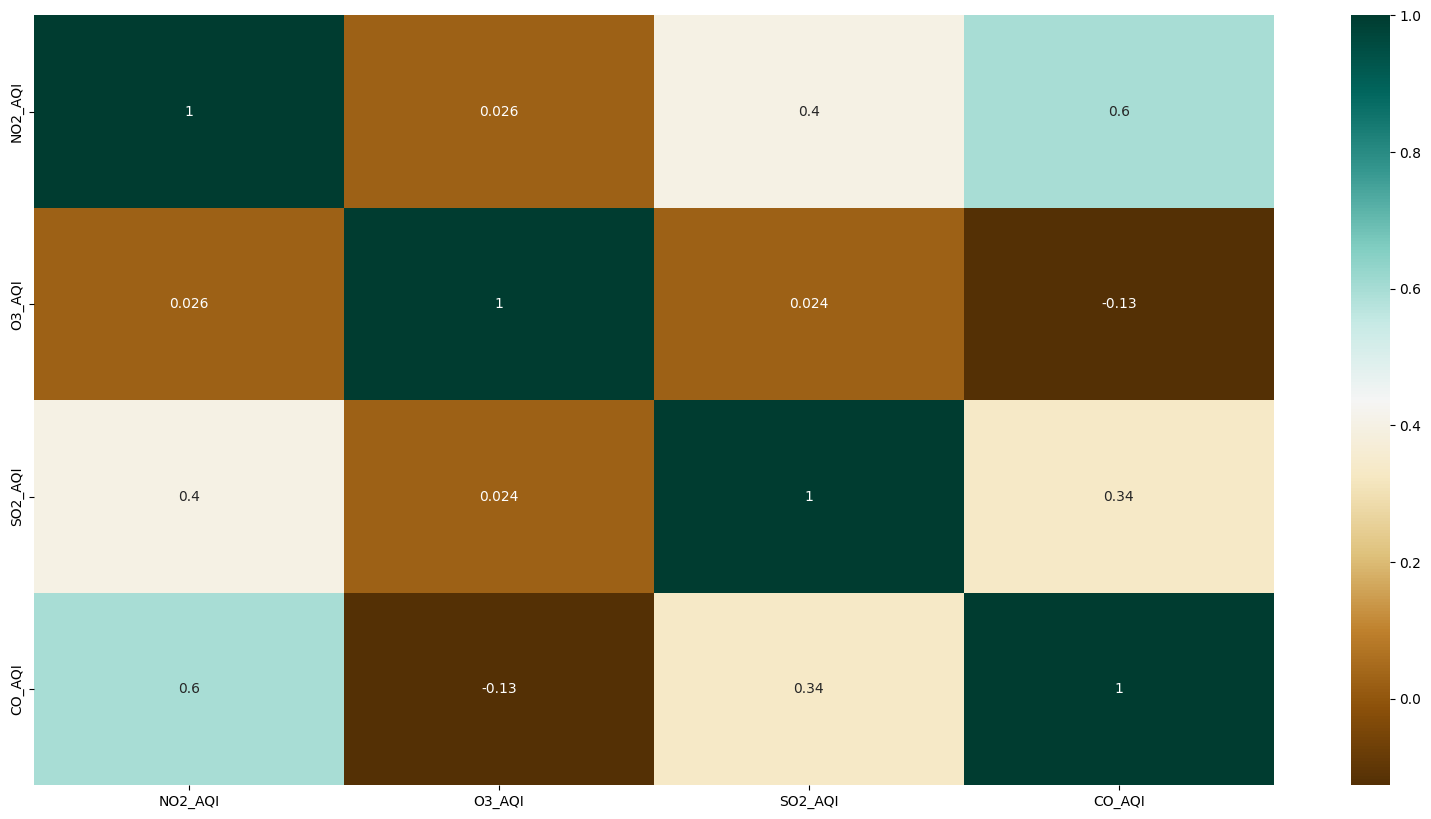

In [19]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= pollSt.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

## Parameters Mean Over Time

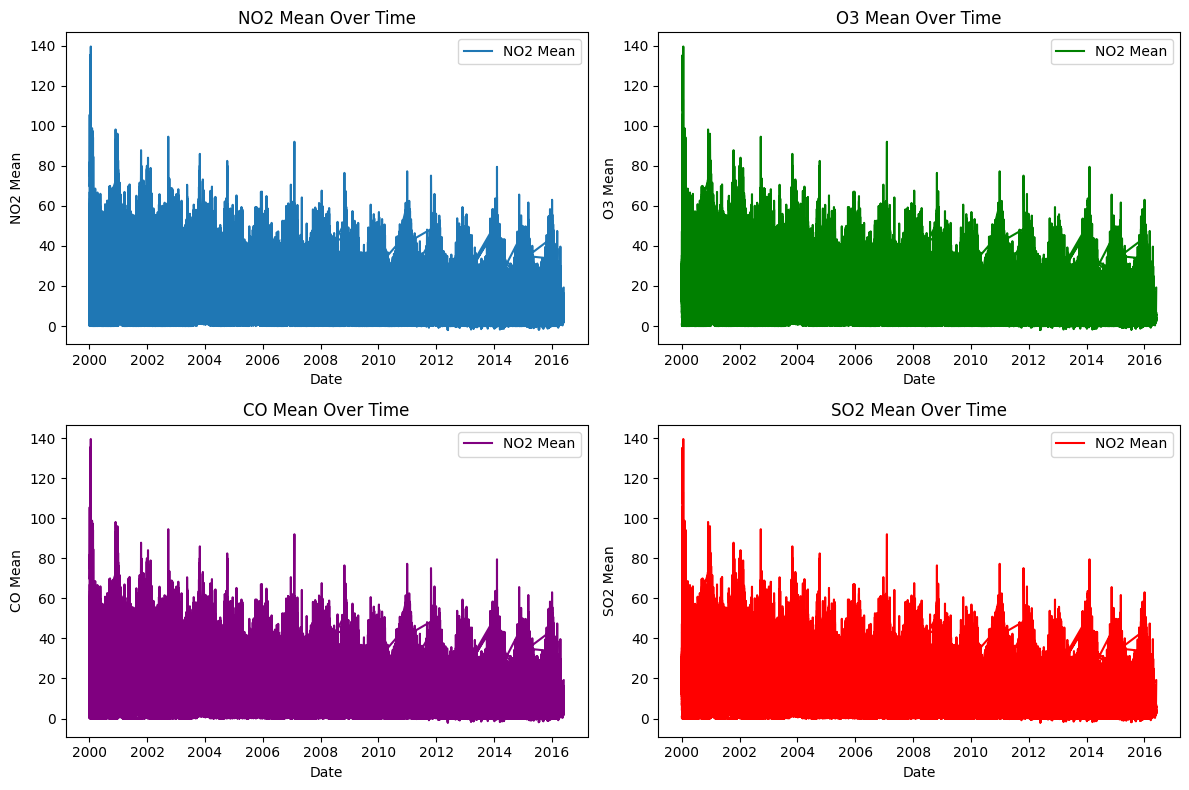

In [52]:
poll['Date Local'] = pd.to_datetime(poll['Date Local'])

plt.figure(figsize=(12,8))

plt.subplot(221)
plt.plot(poll['Date Local'], poll['NO2 Mean'], label='NO2 Mean')
plt.title('NO2 Mean Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 Mean')
plt.legend()

plt.subplot(222)
plt.plot(poll['Date Local'], poll['NO2 Mean'], label='NO2 Mean',color='green')
plt.title('O3 Mean Over Time')
plt.xlabel('Date')
plt.ylabel('O3 Mean')
plt.legend()

plt.subplot(223)
plt.plot(poll['Date Local'], poll['NO2 Mean'], label='NO2 Mean', color='purple')
plt.title('CO Mean Over Time')
plt.xlabel('Date')
plt.ylabel('CO Mean')
plt.legend()

plt.subplot(224)
plt.plot(poll['Date Local'], poll['NO2 Mean'], label='NO2 Mean',color='red')
plt.title('SO2 Mean Over Time')
plt.xlabel('Date')
plt.ylabel('SO2 Mean')
plt.legend()

plt.tight_layout()
plt.show()

## Scatterplots

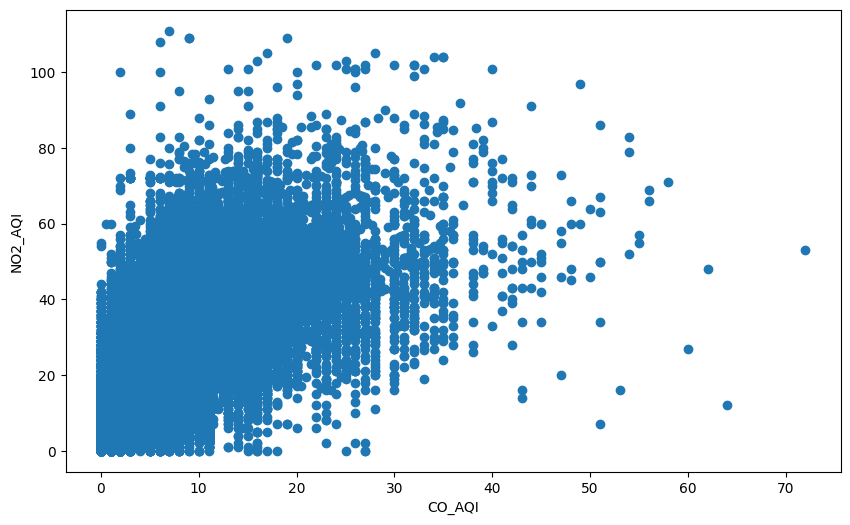

In [20]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(pollSt['CO_AQI'], pollSt['NO2_AQI'])
ax.set_xlabel('CO_AQI')
ax.set_ylabel('NO2_AQI')
plt.show()